In [122]:
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [123]:
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
print("Path to dataset files:", path)
df = pd.read_csv(path+'/Housing.csv')
print(df)
# # df = df[['price', 'area','bedrooms','bathrooms','stories','parking']]
# df




Path to dataset files: C:\Users\apand\.cache\kagglehub\datasets\yasserh\housing-prices-dataset\versions\1
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544

In [124]:
def clean_data(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    if len(categorical_cols) > 0:
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    return df
df_clean = clean_data(df)
df_clean.head()


C:\Users\apand\AppData\Local\Temp\ipykernel_19776\1309076841.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\apand\AppData\Local\Temp\ipykernel_19776\1309076841.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True                            False                         False  
1         False                            False                         False  
2          True                             True                         False  
3          True                            False                         False  
4         False                            False                         False

In [125]:
def plot_output(X_train, y_train, y_pred_train, X_test, y_test, y_pred_test):
    # If only one feature, plot regression line
    if X_train.shape[1] == 1:
        feature_name = X_train.columns[0]
        plt.figure(figsize=(6,4))
        plt.scatter(X_train[feature_name], y_train, color='blue', label='Train Data')
        plt.plot(X_train[feature_name], y_pred_train, color='red', label='Regression Line')
        plt.xlabel(feature_name)
        plt.ylabel('Target')
        plt.title('Feature vs Target (Train)')
        plt.legend()
        plt.show()
    plt.figure(figsize=(6,4))
    plt.scatter(y_train, y_pred_train, color='green')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual (Train)')
    plt.show()
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred_test, color='purple')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual (Test)')
    plt.show()


In [126]:
def run_one(df, IVs, DV):
    X = df[IVs]
    y = df[DV]
    summary = {}
    for col in IVs + [DV]:
        if np.issubdtype(df[col].dtype, np.number):
            summary[col] = {
                'Mean': np.mean(df[col]),
                'Variance': np.var(df[col]),
                'Range': np.ptp(df[col]),
                'Mode': df[col].mode()[0]
            }
        else:
            summary[col] = {
                'Mean': None,
                'Variance': None,
                'Range': None,
                'Mode': df[col].mode()[0]
            }
    print("Summary Statistics:")
    for k,v in summary.items():
        print(f"{k}: {v}")
    
    # --- Split Data ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_r2 = r2_score(y_train, y_pred_train)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_r2 = r2_score(y_test, y_pred_test)
    
    print("\nModel Performance:")
    print(f"Train RMSE: {train_rmse:.4f}, Train R²: {train_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")
    plot_output(X_train, y_train, y_pred_train, X_test, y_test, y_pred_test)
    
    return {
        'Features': IVs,
        'Train_RMSE': train_rmse,
        'Train_R2': train_r2,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2,
        '#Features': len(IVs)
    }


Summary Statistics:
area: {'Mean': 5150.54128440367, 'Variance': 4700870.7510478925, 'Range': 14550, 'Mode': 6000}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1378892.9977, Train R²: 0.2838
Test RMSE: 1846342.6355, Test R²: 0.2656


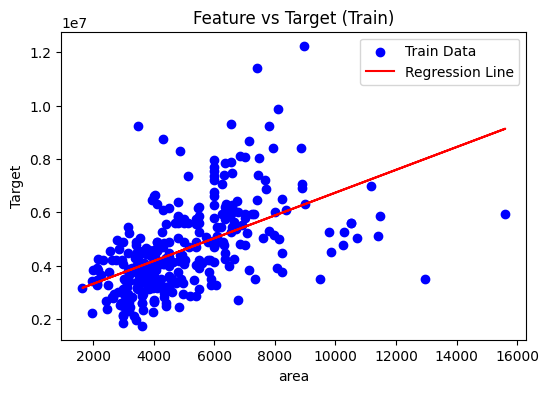

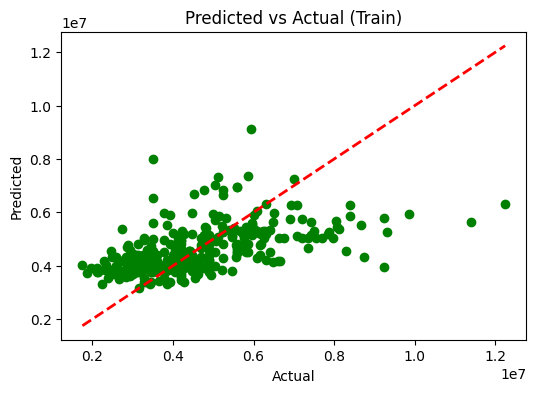

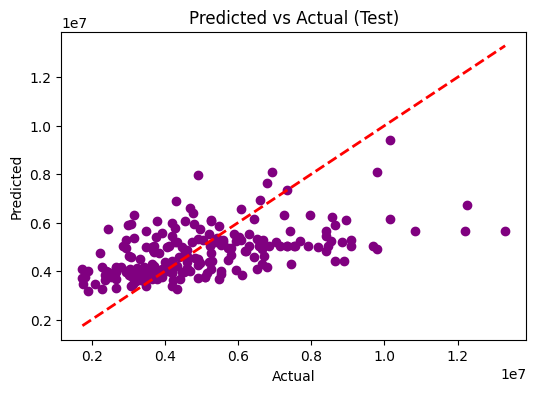


Results Dictionary:
{'Features': ['area'], 'Train_RMSE': 1378892.9977282803, 'Train_R2': 0.28375983372202596, 'Test_RMSE': 1846342.635453399, 'Test_R2': 0.2655671959513226, '#Features': 1}


In [127]:

DV = 'price'  
IVs = [col for col in df_clean.columns if col != DV]
results = run_one(df_clean, ['area'], DV)
print("\nResults Dictionary:")
print(results)


In [128]:
import itertools

In [129]:

def create_combinations(features):
    """
    Create all non-empty combinations of features
    """
    all_combinations = []
    for r in range(1, len(features)+1):
        combos = list(itertools.combinations(features, r))
        all_combinations.extend(combos)
    return all_combinations
features = [col for col in df_clean.columns if col != 'price']
all_combos = create_combinations(features)
print(f"Total combinations: {len(all_combos)}")


Total combinations: 8191


In [130]:
def run_two(df, IVs, DV):
    X = df[IVs]
    y = df[DV]
    summary = {}
    for col in IVs + [DV]:
        if np.issubdtype(df[col].dtype, np.number):
            summary[col] = {
                'Mean': np.mean(df[col]),
                'Variance': np.var(df[col]),
                'Range': np.ptp(df[col]),
                'Mode': df[col].mode()[0]
            }
        else:
            summary[col] = {
                'Mean': None,
                'Variance': None,
                'Range': None,
                'Mode': df[col].mode()[0]
            }
    print("Summary Statistics:")
    for k,v in summary.items():
        print(f"{k}: {v}")
    
    # --- Split Data ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_r2 = r2_score(y_train, y_pred_train)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_r2 = r2_score(y_test, y_pred_test)
    
    print("\nModel Performance:")
    print(f"Train RMSE: {train_rmse:.4f}, Train R²: {train_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")
    
    return {
        'Features': IVs,
        'Train_RMSE': train_rmse,
        'Train_R2': train_r2,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2,
        '#Features': len(IVs)
    }


In [131]:
# Store results for each combination
results_list = []
for combo in all_combos:
    IVs = list(combo)
    res = run_two(df_clean, IVs, 'price')  # Use the run_one function from above
    res['Feature_Combo'] = IVs
    results_list.append(res)
# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results_list)
results_df.head()


Summary Statistics:
area: {'Mean': 5150.54128440367, 'Variance': 4700870.7510478925, 'Range': 14550, 'Mode': 6000}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1378892.9977, Train R²: 0.2838
Test RMSE: 1846342.6355, Test R²: 0.2656
Summary Statistics:
bedrooms: {'Mean': 2.9651376146788992, 'Variance': 0.54373874253009, 'Range': 5, 'Mode': 3}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1518883.2948, Train R²: 0.1309
Test RMSE: 2044590.4372, Test R²: 0.0994
Summary Statistics:
bathrooms: {'Mean': 1.2862385321100918, 'Variance': 0.2520124568639004, 'Range': 3, 'Mode': 1}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1450879.6655, Train R²: 0.2070
Test RMSE: 1815355.6770, Test R²: 0.2900
Summary Statistics:
stories: {'Mean':

Features    Train_RMSE  Train_R2     Test_RMSE   Test_R2  #Features  \
0       [area]  1.378893e+06  0.283760  1.846343e+06  0.265567          1   
1   [bedrooms]  1.518883e+06  0.130947  2.044590e+06  0.099383          1   
2  [bathrooms]  1.450880e+06  0.207023  1.815356e+06  0.290012          1   
3    [stories]  1.499824e+06  0.152620  1.974214e+06  0.160316          1   
4    [parking]  1.526778e+06  0.121890  2.006894e+06  0.132287          1   

  Feature_Combo  
0        [area]  
1    [bedrooms]  
2   [bathrooms]  
3     [stories]  
4     [parking]

In [132]:
# Sort by Test RMSE ascending and Test R2 descending
results_df['Score'] = results_df['Test_R2'] / results_df['Test_RMSE']  
top10 = results_df.sort_values(by='Score', ascending=False).head(10)
top10.reset_index(drop=True, inplace=True)
top10


Features     Train_RMSE  Train_R2  \
0  [area, bedrooms, bathrooms, stories, parking, ...  952853.294747  0.657981   
1  [area, bathrooms, stories, parking, mainroad_y...  955071.618430  0.656387   
2  [area, bedrooms, bathrooms, stories, parking, ...  959564.725815  0.653146   
3  [area, bathrooms, stories, parking, mainroad_y...  961334.782718  0.651866   
4  [area, bedrooms, bathrooms, stories, parking, ...  950931.488705  0.659360   
5  [area, bathrooms, stories, parking, mainroad_y...  953181.436004  0.657746   
6  [area, bedrooms, bathrooms, stories, parking, ...  957770.415933  0.654442   
7  [area, bedrooms, bathrooms, stories, parking, ...  967798.925123  0.647168   
8  [area, bedrooms, bathrooms, stories, parking, ...  966823.746868  0.647879   
9  [area, bathrooms, stories, parking, mainroad_y...  959563.795456  0.653147   

      Test_RMSE   Test_R2  #Features  \
0  1.223388e+06  0.677555         12   
1  1.224099e+06  0.677180         11   
2  1.225454e+06  0.676465         11   
3  1.226581e+06  0.675870         10   
4  1.227286e+06  0.675497         13   
5  1.227995e+06  0.675122         12   
6  1.228594e+06  0.674805         12   
7  1.229381e+06  0.674388         11   
8  1.229610e+06  0.674267         12   
9  1.229751e+06  0.674192         11   

                                       Feature_Combo         Score  
0  [area, bedrooms, bathrooms, stories, parking, ...  5.538347e-07  
1  [area, bathrooms, stories, parking, mainroad_y...  5.532066e-07  
2  [area, bedrooms, bathrooms, stories, parking, ...  5.520115e-07  
3  [area, bathrooms, stories, parking, mainroad_y...  5.510193e-07  
4  [area, bedrooms, bathrooms, stories, parking, ...  5.503989e-07  
5  [area, bathrooms, stories, parking, mainroad_y...  5.497755e-07  
6  [area, bedrooms, bathrooms, stories, parking, ...  5.492498e-07  
7  [area, bedrooms, bathrooms, stories, parking, ...  5.485591e-07  
8  [area, bedrooms, bathrooms, stories, parking, ...  5.483585e-07  
9  [area, bathrooms, stories, parking, mainroad_y...  5.482342e-07

C:\Users\apand\AppData\Local\Temp\ipykernel_19776\1302175798.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


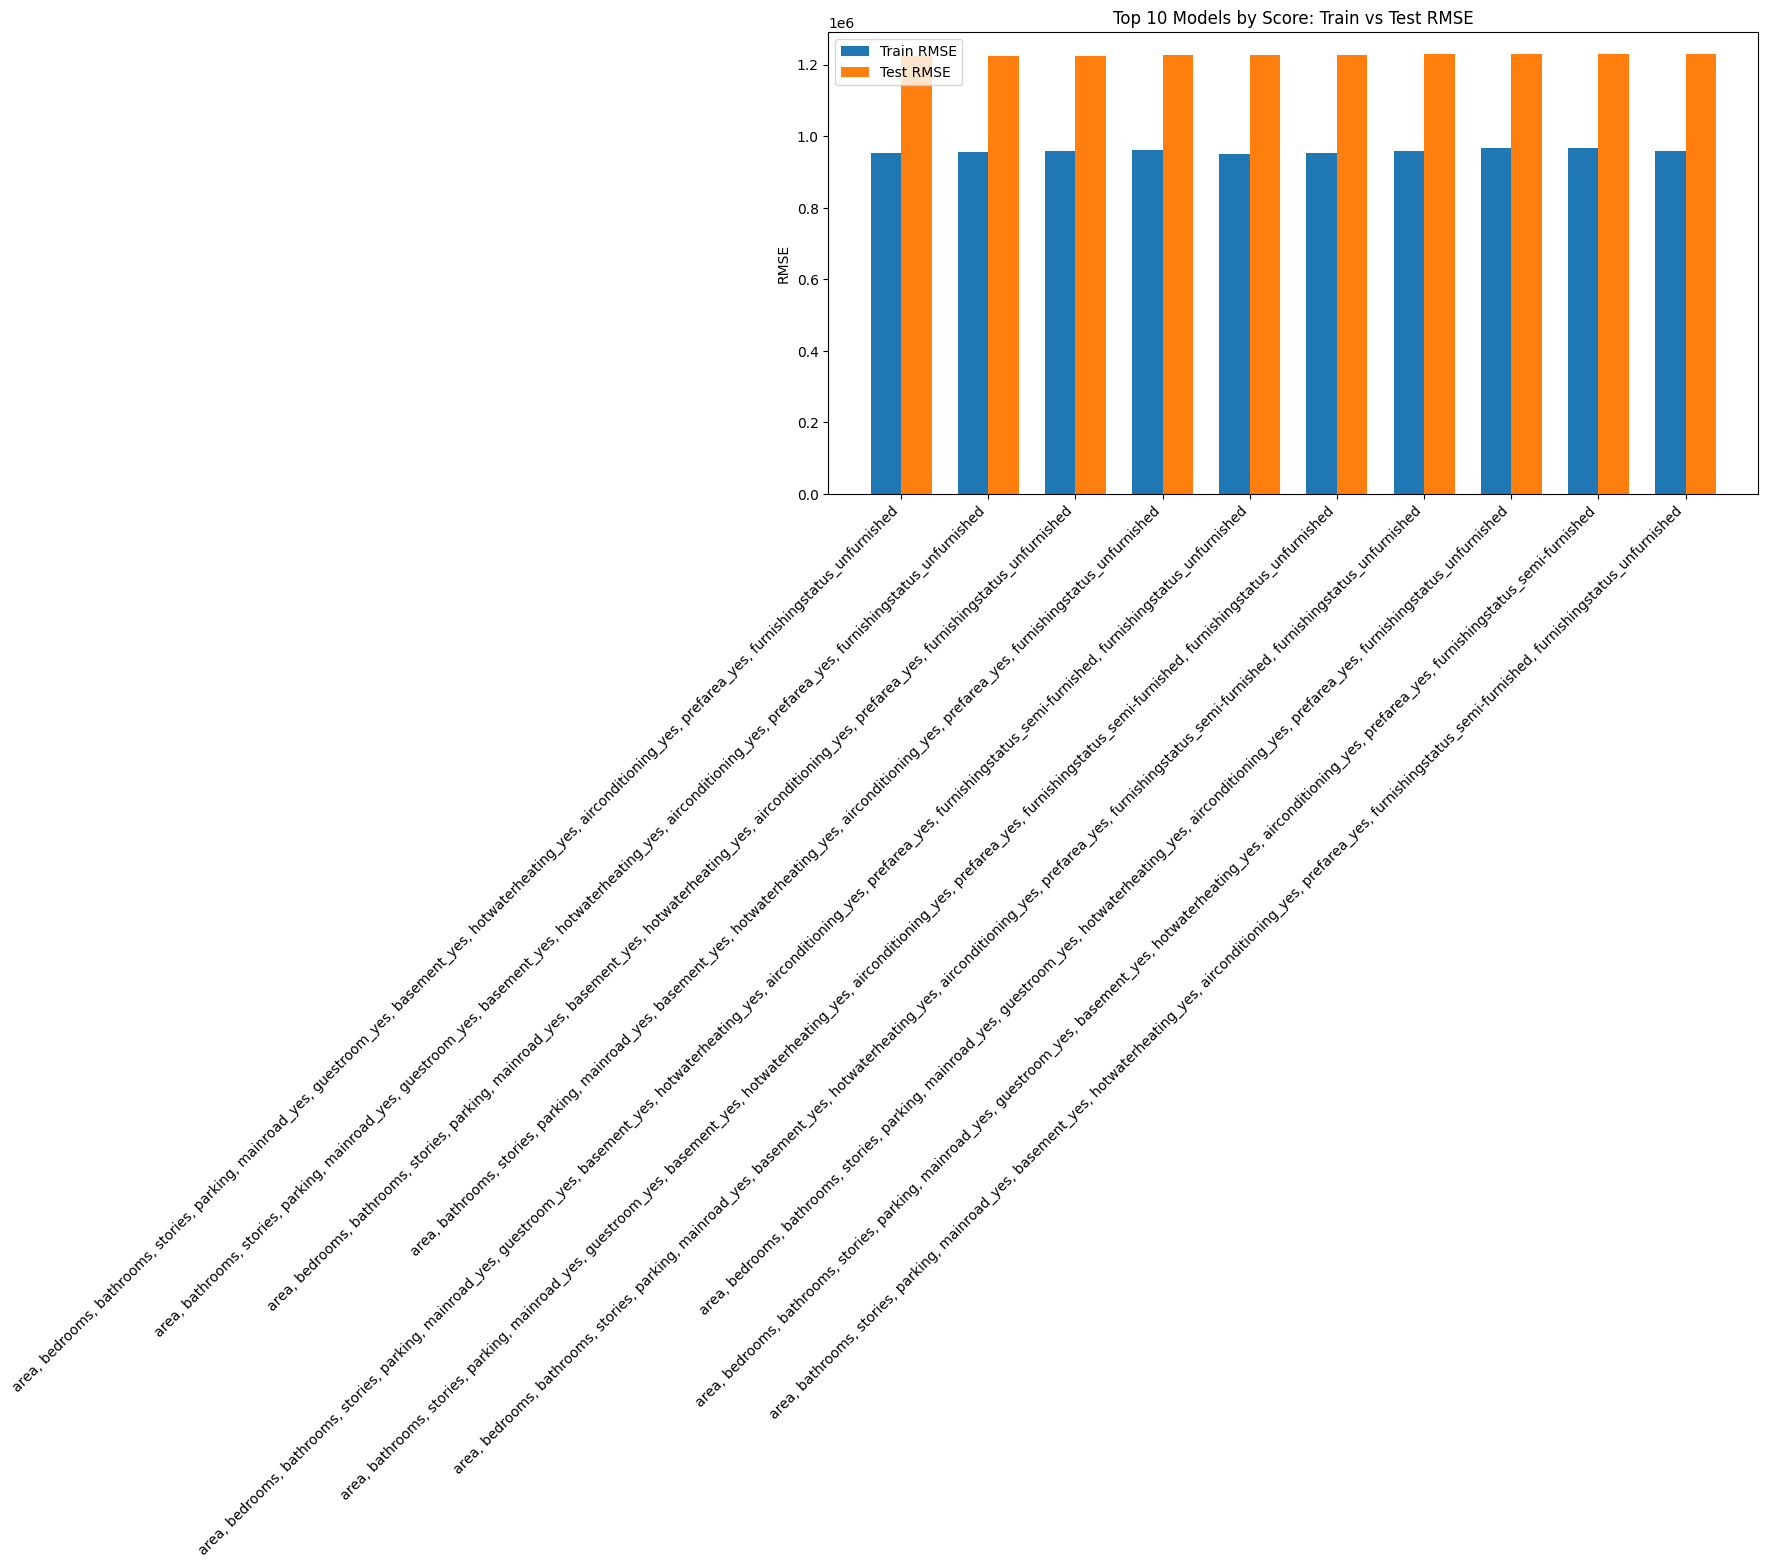

In [133]:
plt.figure(figsize=(12,6))
bar_width = 0.35
index = np.arange(len(top10))

plt.bar(index, top10['Train_RMSE'], bar_width, label='Train RMSE')
plt.bar(index + bar_width, top10['Test_RMSE'], bar_width, label='Test RMSE')

plt.xticks(index + bar_width/2, [', '.join(f) for f in top10['Feature_Combo']], rotation=45, ha='right')
plt.ylabel('RMSE')
plt.title('Top 10 Models by Score: Train vs Test RMSE')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\apand\AppData\Local\Temp\ipykernel_19776\3378400643.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


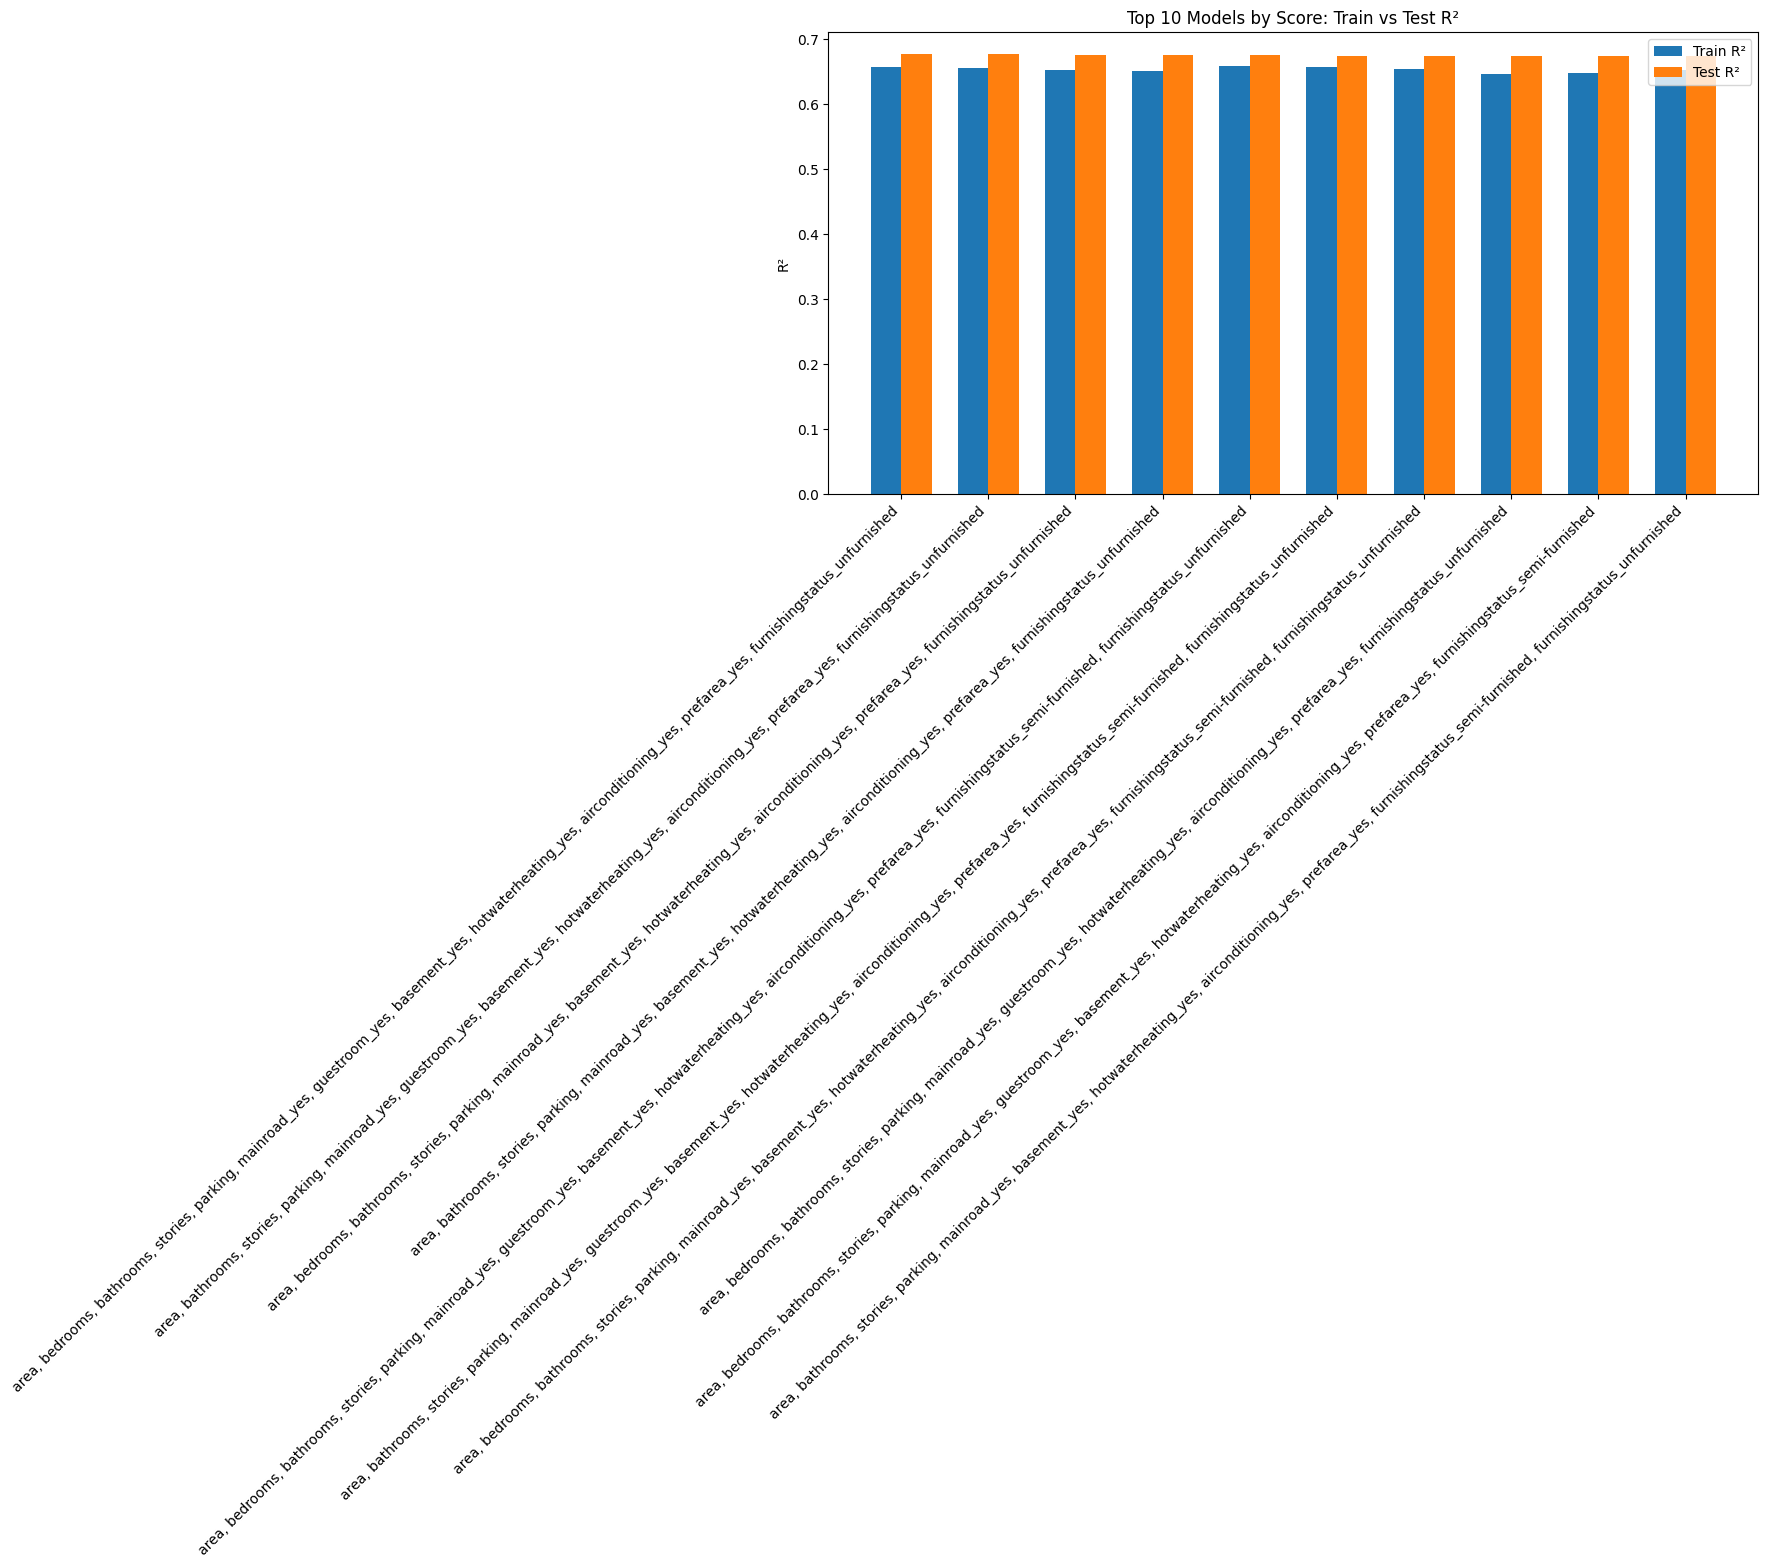

In [134]:
plt.figure(figsize=(12,6))
bar_width = 0.35
index = np.arange(len(top10))

plt.bar(index, top10['Train_R2'], bar_width, label='Train R²')
plt.bar(index + bar_width, top10['Test_R2'], bar_width, label='Test R²')

plt.xticks(index + bar_width/2, [', '.join(f) for f in top10['Feature_Combo']], rotation=45, ha='right')
plt.ylabel('R²')
plt.title('Top 10 Models by Score: Train vs Test R²')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Add feature count
top10['Num_Features'] = top10['#Features']
top10['Adjusted_Score'] = top10['Test_R2'] / top10['Test_RMSE'] / top10['Num_Features']
best_model = top10.sort_values(by='Adjusted_Score', ascending=False).iloc[0]
print("Best Model Combination Based on Adjusted Score:")
print("Features:", best_model['Feature_Combo'])
print(f"Train RMSE: {best_model['Train_RMSE']:.4f}, Test RMSE: {best_model['Test_RMSE']:.4f}")
print(f"Train R²: {best_model['Train_R2']:.4f}, Test R²: {best_model['Test_R2']:.4f}")
print("Number of Features:", best_model['Num_Features'])


Best Model Combination Based on Adjusted Score:
Features: ['area', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_unfurnished']
Train RMSE: 961334.7827, Test RMSE: 1226580.6765
Train R²: 0.6519, Test R²: 0.6759
Number of Features: 10
